---
title: "maximum likelihood estimation"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

![](always-has-been.png)

The one idea that permeates all of statistics and machine learning is that of maximum likelihood estimation. I cannot overstate its centrality.

In the chapter on [probability and likelihood](/foundations/probability_and_likelihood.ipynb), we solved a practical example of estimating the rate parameter of an exponential distribution using maximum likelihood estimation. For the case where we observed many samples, we found that the formula for the mean naturally emerged as the maximum likelihood estimator for the rate parameter. We will dig deeper into this idea, and show deep connections between maximum likelihood estimation and many other statistical concepts.

## log likelihood

We already saw the formula for the likelihood for multiple independent observations:

$$
L(\lambda \mid t_1, t_2, \ldots, t_n) = \prod_{i=1}^{n} L(\lambda \mid t_i),
$$

We justified the product form by assuming that the observations are "iid", meaning independent and identically distributed. Instead of working with the product form, it is often more convenient to work with the log likelihood, which converts the product into a sum:

$$
\ell(\theta \mid x_{1:n}) = \log L(\theta \mid x_{1:n}) = \sum_{i=1}^{n} \log L(\theta \mid x_i) = \sum_{i=1}^{n} \log P( x_i \mid \theta).
$$

Here we changed the notation a bit to use $\theta$ for the parameters (which could be a vector) and $x$ for the data vector, which is more common in statistics. 
There are a few reasons why we prefer to work with the log likelihood instead of the likelihood itself:

* **Numerical Stability (Underflow):** In [likelihood with multiple observations](/foundations/probability_and_likelihood.html#q3-likelihood-with-multiple-observations), we saw that likelihoods are products: $\prod P(x_i)$. If you have 100 observations, you are multiplying 100 small numbers, which can lead to numerical underflow where a computer rounds the result to zero. Summing logs, $\sum \ln P(x_i​)$, keeps the numbers in a range computers can handle.
* **Mathematical Elegance:** Many common distributions (like the Exponential or Normal) use $e$, Euler's number. The natural log cancels the exponent, turning products of complex terms into simple sums that are much easier to differentiate.
* **Preservation of the Maximum:** Because ln(x) is a monotonically increasing function, the value of $\theta$ that maximizes the log-likelihood is identical to the value that maximizes the likelihood.
* **Optimization Surface:** Taking the log reshapes the likelihood surface. It stretches out the extremely steep slopes near the peak, creating a well-behaved "hill" that optimization algorithms can navigate reliably without the fluctuations caused by nearly-vertical gradients.

## where summary statistics come from

Let's do the following exercise. Suppose we have $n$ iid observations $x$ from a model with parameters $\theta$. Using the definition of the log likelihood, derive the maximum likelihood estimator for $\theta$.

### normal distribution

The normal distribution is defined by two parameters: the mean $\mu$ and the standard deviation $\sigma$. As an example, consider measuring the heights of a group of people. We can assume that the heights are normally distributed with some unknown mean and standard deviation.

Its probability density function is given by:
$$
f(x \mid \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right).
$$

The log likelihood reads:

\begin{align*}
\ell(\mu, \sigma \mid x_{1:n}) &= \sum_{i=1}^{n} \log f(x_i \mid \mu, \sigma) \\
&= \sum_{i=1}^{n} \log \left( \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \right) \\
&= \sum_{i=1}^{n} \left( -\log(\sigma \sqrt{2\pi}) - \frac{(x_i - \mu)^2}{2\sigma^2} \right) \\
&= -n \log(\sigma) -n \log(\sqrt{2\pi}) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2.
\end{align*}

Maximizing the log likelihood with respect to $\mu$ and $\sigma$ involves taking partial derivatives, setting them to zero, and solving for the parameters.

For $\mu$, we have:

\begin{align*}
\frac{\partial \ell}{\partial \mu} &= \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu) \\
&= \frac{1}{\sigma^2} \left( \sum_{i=1}^{n} x_i - n\mu \right) = 0.
\end{align*}

Solving for $\mu$ gives:
$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i,
$$
which is the sample mean.

Now, for $\sigma$, we have:

\begin{align*}
\frac{\partial \ell}{\partial \sigma} &= -\frac{n}{\sigma} + \frac{1}{\sigma^3} \sum_{i=1}^{n} (x_i - \mu)^2 \\
&= \frac{1}{\sigma^3} \left( -n\sigma^2 + \sum_{i=1}^{n} (x_i - \mu)^2 \right) = 0.
\end{align*}

Solving for $\sigma$ gives:
$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu})^2,
$$
which is the sample variance (using $n$ in the denominator for MLE).

Going back to the height example, our MLEs for the mean and standard deviation of heights are simply the sample mean and sample standard deviation of the observed heights.

In [30]:
#| code-summary: "import libraries"
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon


/var/folders/cn/m58l7p_j6j10_4c43j4pd8gw0000gq/T/ipykernel_11501/2734844405.py:1: RuntimeWarning: divide by zero encountered in divide
  pdf_normal = lambda x, mu, sigma: (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)
/var/folders/cn/m58l7p_j6j10_4c43j4pd8gw0000gq/T/ipykernel_11501/2734844405.py:1: RuntimeWarning: invalid value encountered in multiply
  pdf_normal = lambda x, mu, sigma: (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)


[Text(0.5, 0, '$\\sigma$'), Text(0, 0.5, 'pdf at $x=0.5$, $\\mu=0$')]

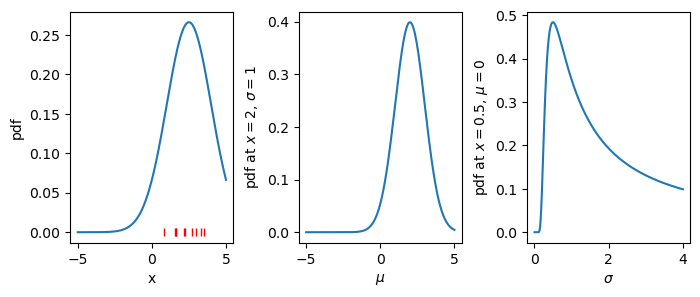

In [29]:
pdf_normal = lambda x, mu, sigma: (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)

fig, ax = plt.subplots(1,3, figsize=(8,3))
fig.subplots_adjust(wspace=0.4)
x = np.linspace(-5, 5, 1000)
mu = np.linspace(-5, 5, 1000)
sigma = np.linspace(0, 4, 1000)

ideal_mu = 2.5
ideal_sigma = 1.5
data = norm.rvs(size=10, loc=ideal_mu, scale=ideal_sigma)

ax[0].plot(x, pdf_normal(x, mu=ideal_mu, sigma=ideal_sigma))
ax[0].plot(data, np.zeros_like(data), ls='None', marker='|', color='red')
ax[0].set(xlabel='x', ylabel='pdf')

ax[1].plot(mu, pdf_normal(2, mu, sigma=1))
ax[0].set(xlabel='x', ylabel='pdf')
ax[1].set(xlabel=r'$\mu$', ylabel=r'pdf at $x=2$, $\sigma=1$')

ax[2].plot(sigma, pdf_normal(x=0.5, mu=0, sigma=sigma))
ax[1].set(xlabel=r'$\mu$', ylabel=r'pdf at $x=2$, $\sigma=1$')
ax[2].set(xlabel=r'$\sigma$', ylabel=r'pdf at $x=0.5$, $\mu=0$')

### binomial distribution

The binomial distribution models the number of successes in $n$ independent Bernoulli trials, each with success probability $p$. A very common example is flipping a biased coin, whose probability of yielding heads is $p$, flipping it $n$ times and counting the number of heads $k$.
Its probability mass function is given by:
$$
P(X = k \mid n, p) = \binom{n}{k} p^k (1 - p)^{n - k}.
$$
The log likelihood reads:

\begin{align*}
\ell(p \mid k, n) &= \log P(X = k \mid n, p) \\
&= \log \left( \binom{n}{k} p^k (1 - p)^{n - k} \right) \\
&= \log \binom{n}{k} + k \log p + (n - k) \log (1 - p).
\end{align*}

To find the maximum likelihood estimator for $p$, we take the derivative of the log likelihood with respect to $p$ and set it to zero:

\begin{align*}
\frac{d\ell}{dp} &= \frac{k}{p} - \frac{n - k}{1 - p} = 0.
\end{align*}

Solving for $p$ gives:
$$
\hat{p} = \frac{k}{n},
$$
which is the sample proportion of successes.
Going back to the coin example, if we flip the coin 100 times and get 60 heads, our MLE for $p$ would be $\hat{p} = 60/100 = 0.6$.

### Laplace distribution

The Laplace distribution, also known as the double exponential distribution, is characterized by its location parameter $\mu$ and scale parameter $b$. We use the normal distribution for 'well-behaved' data like human heights. We use the Laplace distribution for 'wild' data like stock market data, where outliers aren't just mistakes—they are part of the system. For example, most days the price of a stock barely moves, but rare events (market crashes or surges) happen much more often than a Normal distribution would allow.

Its probability density function is given by:
$$
f(x \mid \mu, b) = \frac{1}{2b} \exp\left(-\frac{|x - \mu|}{b}\right).
$$

The log likelihood reads:

\begin{align*}
\ell(\mu, b \mid x_{1:n}) &= \sum_{i=1}^{n} \log f(x_i \mid \mu, b) \\
&= \sum_{i=1}^{n} \log \left( \frac{1}{2b} \exp\left(-\frac{|x_i - \mu|}{b}\right) \right) \\
&= \sum_{i=1}^{n} \left( -\log(2b) - \frac{|x_i - \mu|}{b} \right) \\
&= -n \log(2b) - \frac{1}{b} \sum_{i=1}^{n} |x_i - \mu|.
\end{align*}

Maximizing the log likelihood with respect to $\mu$ and $b$ involves taking partial derivatives, setting them to zero, and solving for the parameters.

For $\mu$, we have:

\begin{align*}
\frac{\partial \ell}{\partial \mu} &= \frac{1}{b} \sum_{i=1}^{n} \text{sgn}(x_i - \mu) = 0,
\end{align*}
where $\text{sgn}(x)$ is the sign function, which returns -1 for negative values, 1 for positive values, and 0 for zero.

Solving for $\mu$ is essentially a balancing act. It requires us finding a value for $\mu$ such that the number of positive ones (points above $\mu$) exactly cancels out the number of negative ones (points below $\mu$). This happens when $\mu$ is the median of the data:
$$
\hat{\mu} = \text{median}(x_{1:n}).
$$


Now, for $b$, we have:

\begin{align*}
\frac{\partial \ell}{\partial b} &= -\frac{n}{b} + \frac{1}{b^2} \sum_{i=1}^{n} |x_i - \mu| = 0.
\end{align*}

Solving for $b$ gives:
$$
\hat{b} = \frac{1}{n} \sum_{i=1}^{n} |x_i - \hat{\mu}|,
$$
which is the mean absolute deviation (MAD) from the median. This measure of spread is more robust to outliers than the standard deviation.

Going back to the stock market example, our MLEs for the location and scale parameters are simply the sample median and mean absolute deviation from the median of the observed returns.

### Poisson distribution

The Poisson distribution models the number of events occurring in a fixed interval of time or space, given a known average rate of occurrence $\lambda$. A common example is counting the number of emails received in an hour, or the number of radioactive decays detected in a piece of radioactive material over a certain period.
Its probability mass function is given by:
$$
P(X = k \mid \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}.
$$
The log likelihood reads:

\begin{align*}
\ell(\lambda \mid k_{1:n}) &= \sum_{i=1}^{n} \log P(X = k_i \mid \lambda) \\
&= \sum_{i=1}^{n} \left( k_i \log \lambda - \lambda - \log(k_i!) \right) \\
&= \left(\sum_{i=1}^{n} k_i \right) \log \lambda - n \lambda - \sum_{i=1}^{n} \log(k_i!).
\end{align*}

To find the maximum likelihood estimator for $\lambda$, we take the derivative of the log likelihood with respect to $\lambda$ and set it to zero:

\begin{align*}
\frac{d\ell}{d\lambda} &= \frac{\sum_{i=1}^{n} k_i}{\lambda} - n = 0.
\end{align*}

Solving for $\lambda$ gives:
$$
\hat{\lambda} = \frac{1}{n} \sum_{i=1}^{n} k_i,
$$
which is the sample mean of the observed counts.

### uniform distribution

The uniform distribution models a situation where all outcomes in a given range are equally likely. A common example is rolling a fair die, where each face (1 through 6) has an equal probability of landing face up.
Its probability density function is given by:
$$
f(x \mid a, b) = \frac{1}{b - a} \text{ for } a \leq x \leq b.
$$

The log likelihood reads:

\begin{align*}
\ell(a, b \mid x_{1:n}) &= \sum_{i=1}^{n} \log f(x_i \mid a, b) \\
&= \sum_{i=1}^{n} \log \left( \frac{1}{b - a} \right) \\
&= -n \log(b - a).
\end{align*}

In this instance, it is much easier to find the maximum likelihood estimators for $a$ and $b$ using the probability density function directly, rather than taking derivatives of the log likelihood. The likelihood reads:
$$
L(a, b \mid x_{1:n}) = \left( \frac{1}{b - a} \right)^n.
$$

The likelihood doesn't have a peak in the usual sense; it increases as the interval $[a, b]$ narrows. In order to maximize the likelihood, the interval must be as small as possible while still containing all observed data points. If at least one data point falls outside the interval, the likelihood becomes zero, because the uniform distribution assigns zero probability to values outside $[a, b]$, and the product of probabilities will include a zero term. The smallest interval that contains all observed data points is defined by the minimum and maximum of the data. Therefore,
$$
\hat{a} = \min(x_{1:n}), \quad \hat{b} = \max(x_{1:n}).
$$

### exponential distribution revisited

We can now revisit our original example of estimating the rate parameter $\lambda$ of an exponential distribution using maximum likelihood estimation. Recall that the probability density function of the exponential distribution is given by:
$$
f(x \mid \lambda) = \lambda e^{-\lambda x}.
$$
The log likelihood reads:

\begin{align*}
\ell(\lambda \mid x_{1:n}) &= \sum_{i=1}^{n} \log f(x_i \mid \lambda) \\
&= \sum_{i=1}^{n} \left( \log \lambda - \lambda x_i \right) \\
&= n \log \lambda - \lambda \sum_{i=1}^{n} x_i.
\end{align*}
To find the maximum likelihood estimator for $\lambda$, we take the derivative of the log likelihood with respect to $\lambda$ and set it to zero:

\begin{align*}
\frac{d\ell}{d\lambda} &= \frac{n}{\lambda} - \sum_{i=1}^{n} x_i = 0.
\end{align*}

Solving for $\lambda$ gives:
$$
\hat{\lambda} = \frac{n}{\sum_{i=1}^{n} x_i} = \frac{1}{\bar{x}},
$$
where $\bar{x}$ is the sample mean of the observed data. This result aligns with our previous derivation using the likelihood function directly.

/var/folders/cn/m58l7p_j6j10_4c43j4pd8gw0000gq/T/ipykernel_11501/1145739478.py:20: RuntimeWarning: divide by zero encountered in log
  ax[0,2].contourf(LAM, X, np.log(Z), levels=10)
/var/folders/cn/m58l7p_j6j10_4c43j4pd8gw0000gq/T/ipykernel_11501/1145739478.py:23: RuntimeWarning: divide by zero encountered in log
  log_like = [np.sum(np.log(pdf_expon(data, l))) for l in lmbda]


0.7382101265554462
0.7


[(0.0, 5.0),
 Text(0.5, 1.0, 'joint pdf'),
 Text(0.5, 0, '$\\lambda$'),
 Text(0, 0.5, '$x$')]

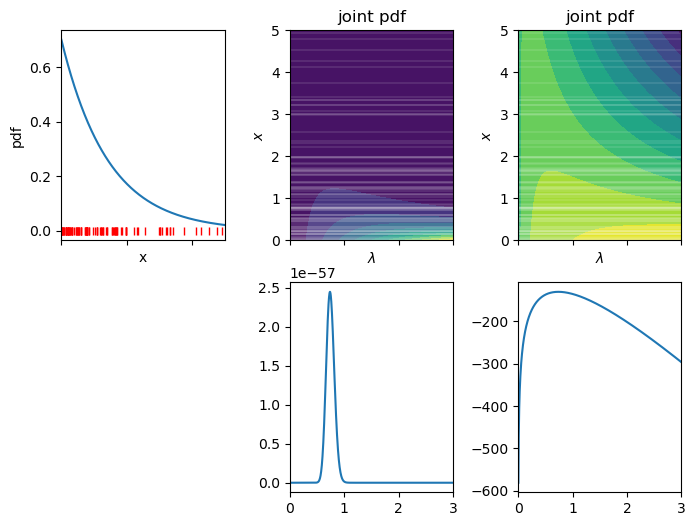

In [92]:
pdf_expon = lambda x, lambd: lambd * np.exp(-lambd * x) * (x >= 0)
fig, ax = plt.subplots(2,3, figsize=(8,6), sharex='col')
fig.subplots_adjust(wspace=0.4)
ax[1,0].set_axis_off()
x = np.linspace(0, 5, 1000)
lmbda = np.linspace(0, 3, 1000)

ideal_lambda = 0.7
np.random.seed(seed=1)
data = expon.rvs(size=100, scale=1/ideal_lambda)

ax[0,0].plot(x, pdf_expon(x, ideal_lambda))
ax[0,0].plot(data, np.zeros_like(data), ls='None', marker='|', color='red')
ax[0,0].set(xlabel='x', ylabel='pdf')

LAM, X = np.meshgrid(lmbda, x)
Z = pdf_expon(X, LAM)
ax[0,1].contourf(LAM, X, Z, levels=10)

ax[0,2].contourf(LAM, X, np.log(Z), levels=10)

like = [np.prod(pdf_expon(data, l)) for l in lmbda]
log_like = [np.sum(np.log(pdf_expon(data, l))) for l in lmbda]
ax[1,1].plot(lmbda, like)
ax[1,2].plot(lmbda, log_like)

for i, xx in enumerate(data):
    ax[0,1].axhline(xx, color='white', ls='-', alpha=0.1)
    ax[0,2].axhline(xx, color='white', ls='-', alpha=0.1)
# ax[1].plot(mu, pdf_normal(2, mu, sigma=1))
# ax[0].set(xlabel='x', ylabel='pdf')
# ax[1].set(xlabel=r'$\mu$', ylabel=r'pdf at $x=2$, $\sigma=1$')

# ax[2].plot(sigma, pdf_normal(x=0.5, mu=0, sigma=sigma))
# ax[1].set(xlabel=r'$\mu$', ylabel=r'pdf at $x=2$, $\sigma=1$')
# ax[2].set(xlabel=r'$\sigma$', ylabel=r'pdf at $x=0.5$, $\mu=0$')
print(1/np.mean(data))
print(ideal_lambda)

ax[0,0].set(xlim=(0, 5))
ax[0,1].set(ylim=(0, 5),
            title="joint pdf",
            xlabel=r"$\lambda$",
            ylabel=r"$x$")
ax[0,2].set(ylim=(0, 5),
            title="joint pdf",
            xlabel=r"$\lambda$",
            ylabel=r"$x$")

0.45520342648272516

### summary

By appliying the reasoning of maximum likelihood estimation to various probability distributions, we have derived the maximum likelihood estimators for their parameters. Notably, we found that:

* For the **normal** distribution, the MLEs are the sample mean and sample standard deviation.
* For the **binomial** distribution, the MLE is the sample proportion of successes.
* For the **Laplace** distribution, the MLEs are the sample median and mean absolute deviation from the median.
* For the **Poisson** distribution, the MLE is the sample mean of the observed counts.
* For the **uniform** distribution, the MLEs are the sample minimum and sample maximum.
* For the **exponential** distribution, the MLE is the reciprocal of the sample mean.

All these estimators are intuitive and align with common summary statistics used in data analysis, highlighting the deep connection between maximum likelihood estimation and descriptive statistics.

